In [9]:
import pandas as pd
import scipy as sc
import numpy as np
import requests
import concurrent.futures
import time
from sklearn import linear_model
import matplotlib.pyplot as plt
%matplotlib inline  
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
import seaborn as sns
from sklearn.metrics import mean_squared_error
from math import sqrt
from sklearn.preprocessing import MinMaxScaler, StandardScaler, normalize
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [10]:
df2 = pd.read_csv('eda_df.csv')
df2['log_value'] = np.log(df2['value']) 

In [11]:
#Training the original model
x = df2[['name','age', 'overall', 'potential', 'position','pace','defending','shooting','passing','dribbling','physical','total_stats']]
y = df2['log_value']
x_train_l, x_test_l, y_train_l, y_test_l = train_test_split( x, y, test_size=0.2, random_state=0)
x_train_li= x_train_l[['age', 'overall', 'potential', 'position','pace','defending','shooting','passing','dribbling','physical','total_stats']]
x_test_li= x_test_l[['age', 'overall', 'potential', 'position','pace','defending','shooting','passing','dribbling','physical','total_stats']]

model = LinearRegression().fit(x_train_li, y_train_l)
predicted_linear= model.predict(x_test_li)
print("LinearRegeression on logged values:")
print('R2 on train set:',model.score(x_train_li, y_train_l))
print('R2 on test set:',model.score(x_test_li, y_test_l))
rms2 = sqrt(mean_squared_error(y_test_l,predicted_linear))
print('RMSE:',rms2)

LinearRegeression on logged values:
R2 on train set: 0.9714039691785556
R2 on test set: 0.9714452051047847
RMSE: 0.23234947672001444


In [44]:
dfnew = pd.read_csv('fifa21test.csv')
dfnew

,name,long_name,age,dob,height_cm,weight_kg,nationality,club_name,league_name,league_rank,...,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb
0,L. Messi,Lionel Andrés Messi Cuccittini,33,24/06/1987,170,72,Argentina,FC Barcelona,Spain Primera Division,1.0,...,66+3,65+3,65+3,65+3,66+3,62+3,52+3,52+3,52+3,62+3
1,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,35,05/02/1985,187,83,Portugal,Juventus,Italian Serie A,1.0,...,65+3,61+3,61+3,61+3,65+3,61+3,54+3,54+3,54+3,61+3
2,J. Oblak,Jan Oblak,27,07/01/1993,188,87,Slovenia,Atlético Madrid,Spain Primera Division,1.0,...,32+3,36+3,36+3,36+3,32+3,32+3,33+3,33+3,33+3,32+3
3,R. Lewandowski,Robert Lewandowski,31,21/08/1988,184,80,Poland,FC Bayern München,German 1. Bundesliga,1.0,...,64+3,65+3,65+3,65+3,64+3,61+3,60+3,60+3,60+3,61+3
4,Neymar Jr,Neymar da Silva Santos Júnior,28,05/02/1992,175,68,Brazil,Paris Saint-Germain,French Ligue 1,1.0,...,67+3,62+3,62+3,62+3,67+3,62+3,49+3,49+3,49+3,62+3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18939,K. Angulo,Kevin Angulo,24,13/04/1996,176,73,Colombia,América de Cali,Colombian Liga Postobón,1.0,...,47+2,47+2,47+2,47+2,47+2,47+2,46+2,46+2,46+2,47+2
18940,Zhang Mengxuan,Mengxuan Zhang,21,26/04/1999,177,70,China PR,Chongqing Dangdai Lifan FC SWM Team,Chinese Super League,1.0,...,42+2,41+2,41+2,41+2,42+2,45+2,47+2,47+2,47+2,45+2
18941,Wang Zhenghao,王政豪,20,28/06/2000,185,74,China PR,Tianjin TEDA FC,Chinese Super League,1.0,...,42+2,42+2,42+2,42+2,42+2,44+2,47+2,47+2,47+2,44+2
18942,Chen Zitong,Zitong Chen,23,20/02/1997,186,80,China PR,Shijiazhuang Ever Bright F.C.,Chinese Super League,1.0,...,47+2,49+2,49+2,49+2,47+2,47+2,49+2,49+2,49+2,47+2


In [45]:
dfnew = dfnew[['name','age', 'overall', 'potential', 'position','pace','defending','shooting','passing','dribbling','physical','total_stats','value']]

In [46]:
dfnew['value'] = dfnew['value'] /1000000
attack = ['ST','CF','LF','RF','RW','LW','CAM','SW']
midfield = ['CM','CDM','LM','RM']
defence = ['LB','LWB','CB','RB','RWB']
dfnew=dfnew.dropna() 
mask_attack = dfnew['position'].isin(attack).shift(0).fillna(False)
mask_midfield = dfnew['position'].isin(midfield).shift(0).fillna(False)
mask_defence = dfnew['position'].isin(defence).shift(0).fillna(False)
mask_goalkeeping = dfnew['position'].isin(['GK']).shift(0).fillna(False)

dfnew.loc[mask_attack, 'position']=4
dfnew.loc[mask_midfield, 'position']=3
dfnew.loc[mask_defence, 'position']=2
dfnew.loc[mask_goalkeeping, 'position']=1


#EDA-change data-types

dfnew['age'] = dfnew['age'].replace({}, regex=True).astype(float).astype(int)
dfnew['overall'] = dfnew['overall'].replace({}, regex=True).astype(float).astype(int)
dfnew['potential'] = dfnew['potential'].replace({}, regex=True).astype(float).astype(int)
dfnew['pace'] = dfnew['pace'].replace({}, regex=True).astype(float).astype(int)
dfnew['dribbling'] = dfnew['dribbling'].replace({}, regex=True).astype(float).astype(int)
dfnew['physical'] = dfnew['physical'].replace({}, regex=True).astype(float).astype(int)
dfnew['passing'] = dfnew['passing'].replace({}, regex=True).astype(float).astype(int)
dfnew['defending'] = dfnew['defending'].replace({}, regex=True).astype(float).astype(int)
dfnew['shooting'] = dfnew['shooting'].replace({}, regex=True).astype(float).astype(int)
dfnew['total_stats'] = dfnew['total_stats'].replace({}, regex=True).astype(float).astype(int)
dfnew['position'] = dfnew['position'].replace({}, regex=True).astype(float).astype(int)

dfnew = dfnew[dfnew.value != 0] #removing zero values
dfnew = dfnew[dfnew.position != 0] #removing zero values
df2 = df2[~df2.name.str.contains(r'[0-9]')]#removing old players

dfnew['log_value'] = np.log(dfnew['value']) 

<ipython-input-46-b266af83377f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfnew['value'] = dfnew['value'] /1000000


In [47]:
newx = dfnew[['name','age', 'overall', 'potential', 'position','pace','defending','shooting','passing','dribbling','physical','total_stats']]
newy = dfnew['log_value']
x_test_new= newx[['age', 'overall', 'potential', 'position','pace','defending','shooting','passing','dribbling','physical','total_stats']]

model = LinearRegression().fit(x_train_li, y_train_l)#practice model of fifa22 dataset
predicted_new= model.predict(x_test_new)#test it on fifa 21!
print("LinearRegeression on logged values:")
print('R2 on test set:',model.score(x_test_new, newy))
rms2 = sqrt(mean_squared_error(newy,predicted_new))
print('RMSE:',rms2)

LinearRegeression on logged values:
R2 on test set: 0.9347884060362736
RMSE: 0.3377448725163632


In [48]:
#The results of linear regression are better!
#Creating the test dataset
newy = np.exp(newy)
predicted_new = np.exp(predicted_new)
test_df = newx.copy()
test_df = test_df[['name', 'overall', 'position']]
test_df['value']= newy 
test_df['value_predicted']= predicted_new

#Adding the column of the difference between original val and predicted val
test_df['difference']= (test_df['value']-test_df['value_predicted']) 
test_df = test_df.sort_values('difference', ascending=False)
test_df.head()

,name,overall,position,value,value_predicted,difference
1729,P. Jansson,75,2,6.5,4.412749,2.087251
1988,A. Silva,75,3,6.5,4.414834,2.085166
670,Mata,79,4,11.5,9.418623,2.081377
1827,S. Okaka,75,4,6.5,4.443061,2.056939
1888,J. Aquino,75,3,6.5,4.449329,2.050671


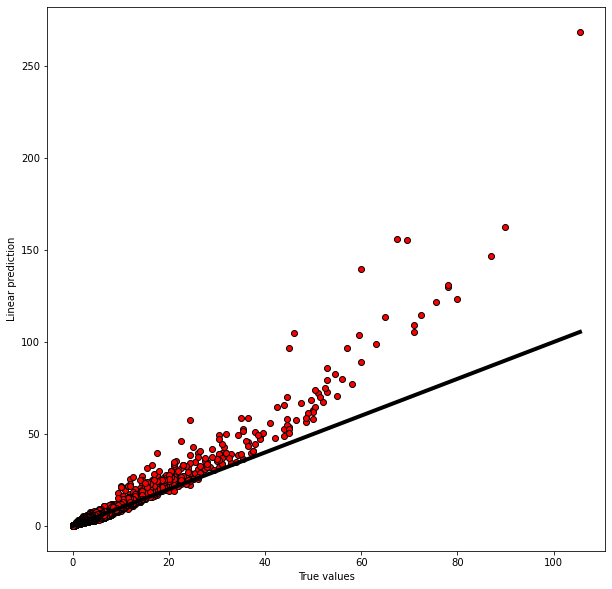

In [49]:
fig, ax = plt.subplots(figsize=(10,10))
ax.scatter(newy, predicted_new, color='red', edgecolors='black')
ax.plot([newy.min(), newy.max()], [newy.min(), newy.max()], "k", lw=4)
ax.set_xlabel("True values")
ax.set_ylabel("Linear prediction")
plt.show()